##Importing Necessary Libraries

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef, ConfusionMatrixDisplay, confusion_matrix


In [ ]:
# Load the JSON data into a Pandas DataFrame
with open('/content/drive/Shareddrives/C4 Lab/@LabAdmin/transactions.txt') as f:
    data = pd.DataFrame([json.loads(line) for line in f])
    #replacing empty cells with nan so that missing values can be identified
    data.replace('', np.nan, inplace=True)

In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
640789,419104777,419104777,50000.0,50000.0,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
28946,674577133,674577133,5000.0,5000.0,2016-01-01 00:01:44,329.57,staples.com,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
222211,958438658,958438658,20000.0,20000.0,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
470320,851126461,851126461,10000.0,10000.0,2016-01-01 00:02:04,122.83,discount.com,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
704106,148963316,148963316,2500.0,2500.0,2016-01-01 00:02:19,0.00,Fast Repair,US,US,05,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False


In [ ]:
print("The dataset has ",data.shape[0], " records and ", data.shape[1]," fields.")

The dataset has  786363  records and  29  fields.


In [ ]:
#Summary statistics of Numerical Variables
data.describe()

,creditLimit,availableMoney,transactionAmount,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,10759.464459,6250.725369,136.985791,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,11636.174890,8880.783989,147.725569,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,250.000000,-1005.630000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5000.000000,1077.420000,33.650000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,7500.000000,3184.860000,87.900000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,15000.000000,7500.000000,191.480000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,50000.000000,50000.000000,2011.540000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identify the categorical and numerical variables
data.columns[data.dtypes != object] 
data.columns[data.dtypes == object]

Index(['accountNumber', 'customerId', 'transactionDateTime', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType'],
      dtype='object')

In [ ]:
#Counting the null values in each field
data.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [ ]:
#Unique values of categorical variables
categorical_cols = ['acqCountry', 'merchantCountryCode',
            'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
            'transactionType']

# loop through all columns in the DataFrame
for col in categorical_cols:
        # get the unique values of the column
        unique_vals = data[col].unique()
        # print the column name and its unique values
        print(col + ":")
        print(unique_vals)
        print("--------------")

acqCountry:
['US' nan 'CAN' 'MEX' 'PR']
--------------
merchantCountryCode:
['US' 'CAN' nan 'PR' 'MEX']
--------------
posEntryMode:
['02' '09' '05' '80' '90' nan]
--------------
posConditionCode:
['01' '08' '99' nan]
--------------
merchantCategoryCode:
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
--------------
transactionType:
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
--------------


##Plot

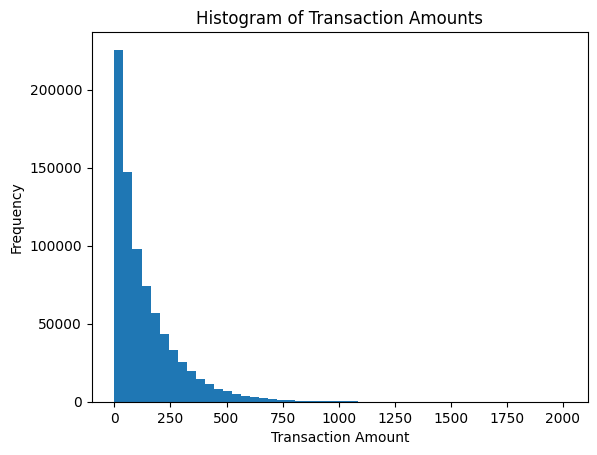

In [ ]:
# create a histogram of transaction amounts
plt.hist(data['transactionAmount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()

Text(0.5, 0.98, 'Data Distribution of Numerical Data')

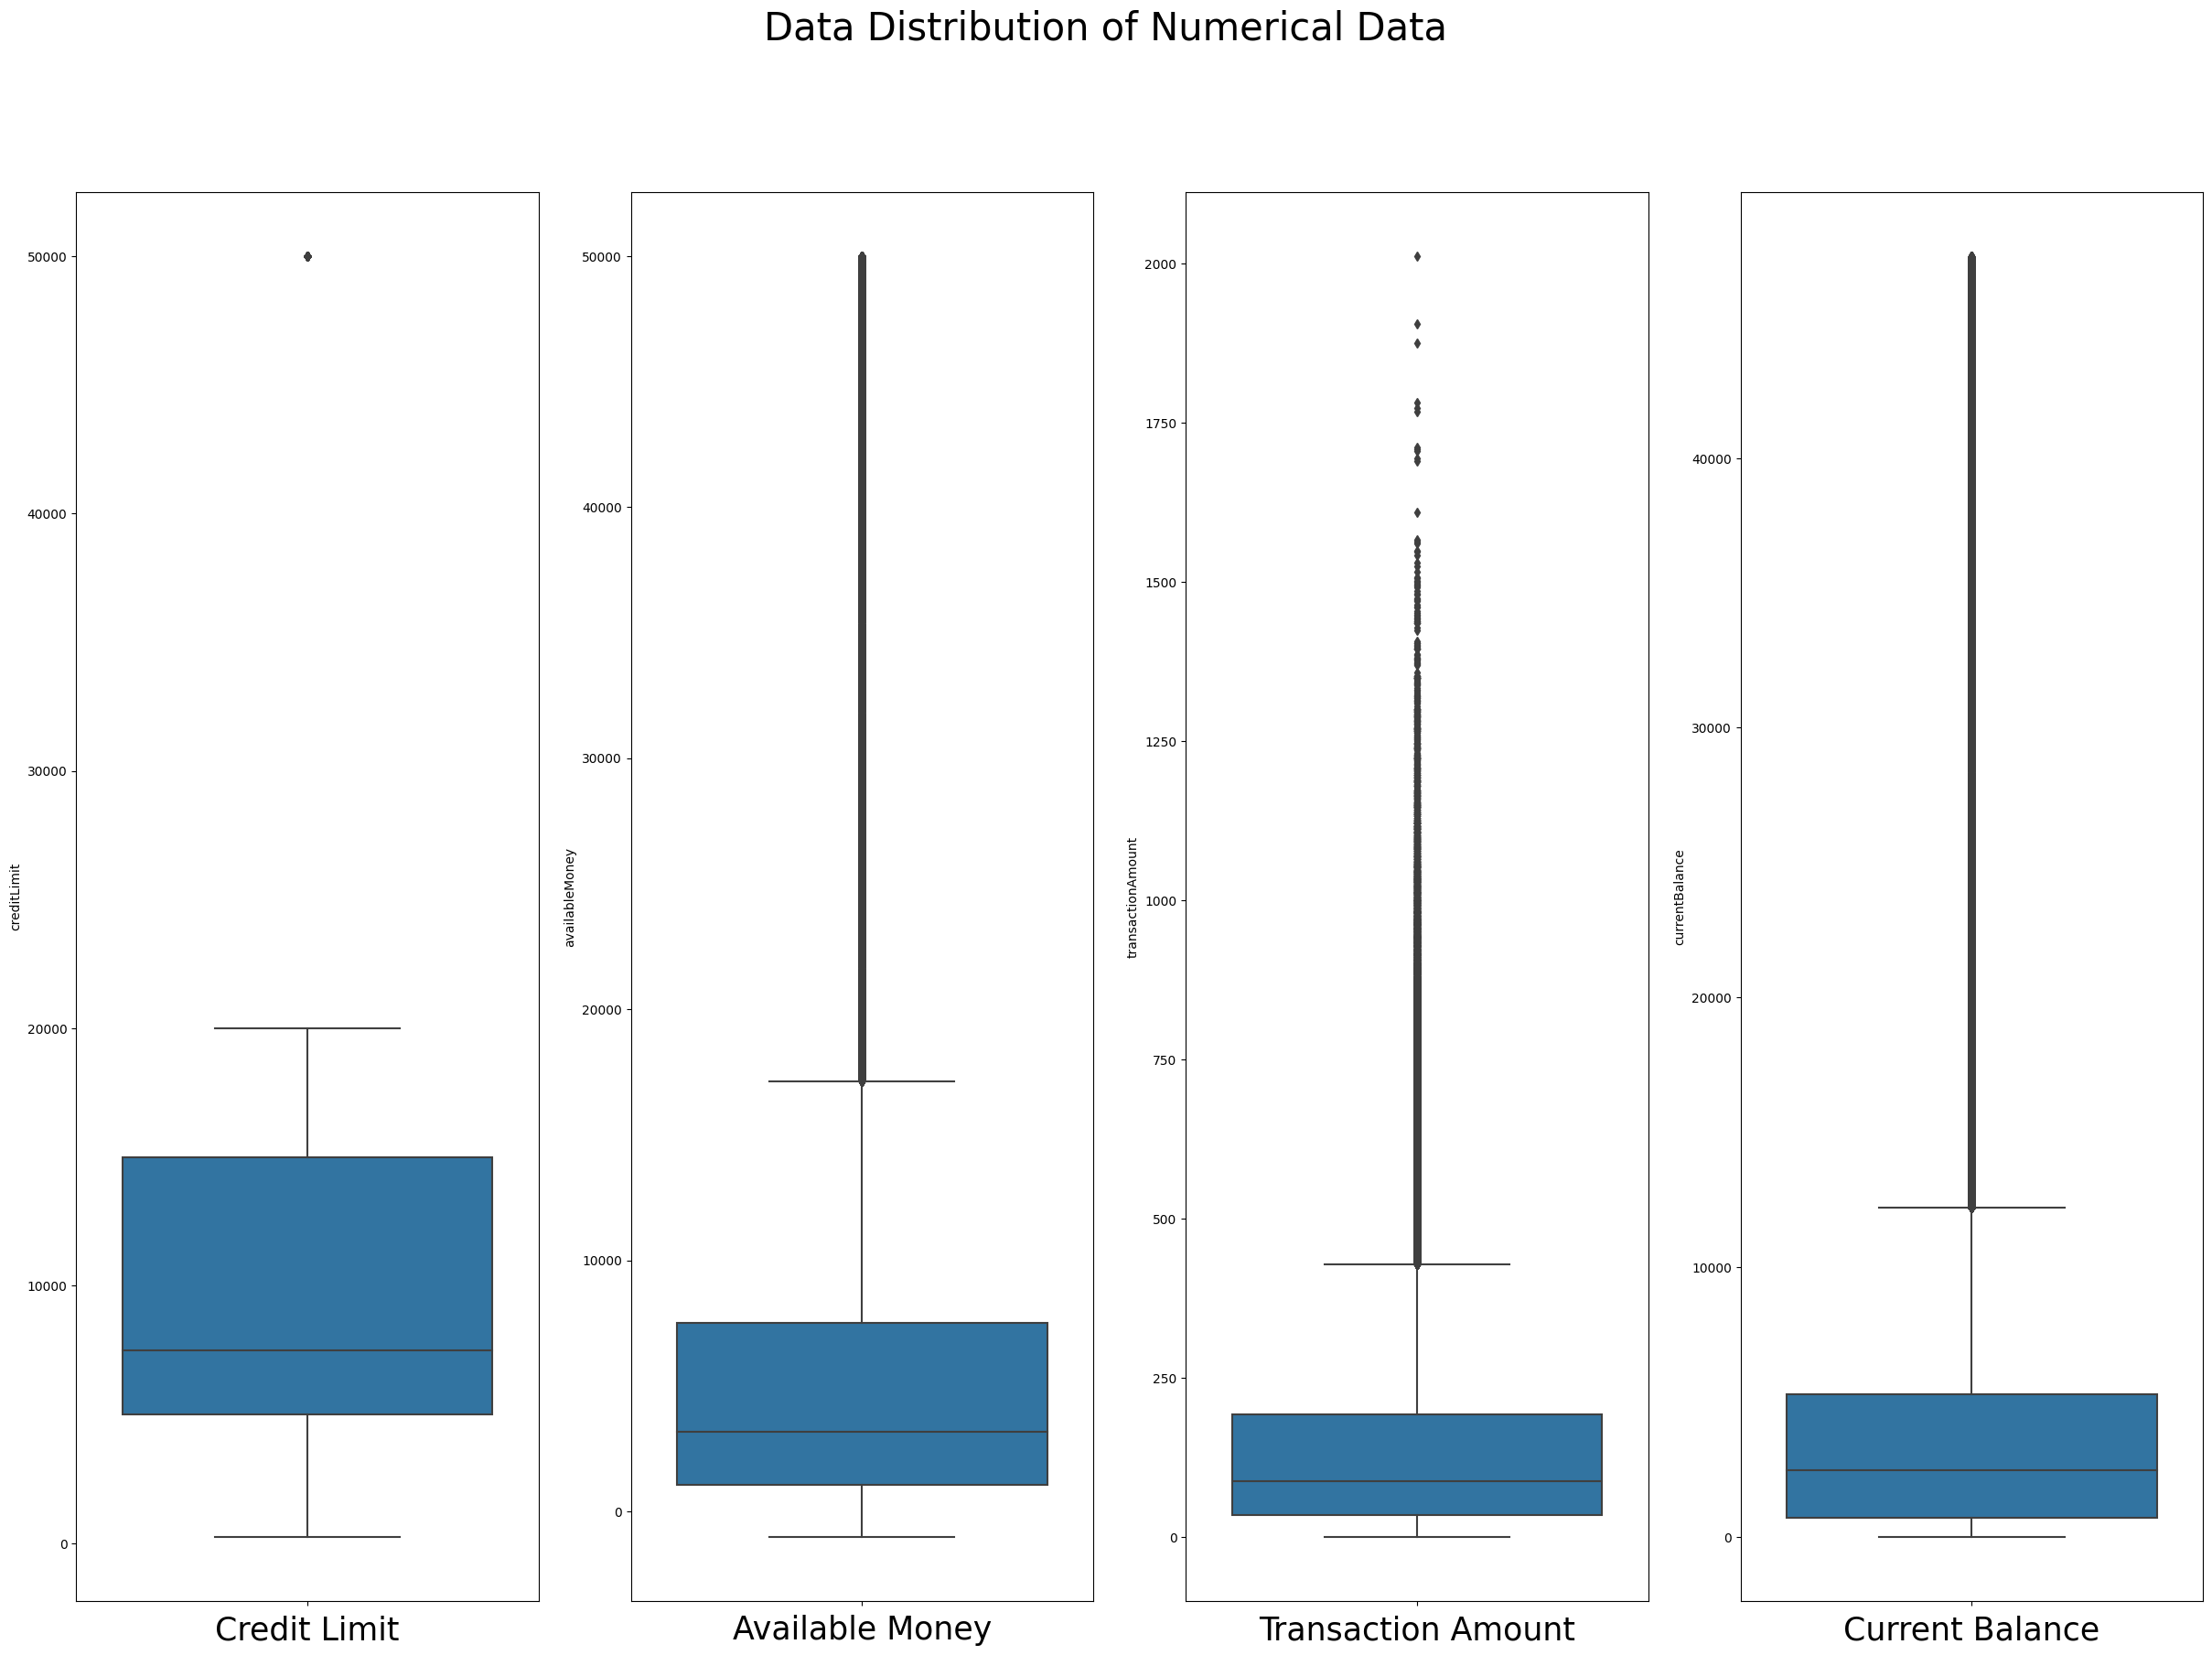

In [ ]:
#Here we use boxplots to view and compare the value ranges for 'Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance'
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

num_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
num_names = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']

for i in range(len(num_cols)):
    sns.boxplot(data=data, y=num_cols[i], ax=ax[i],orient='v')
    ax[i].set_xlabel(num_names[i], fontsize=25)
plt.suptitle('Data Distribution of Numerical Data',fontsize=30)


Text(0.5, 1.0, 'Proportion of Faudulent transactions')

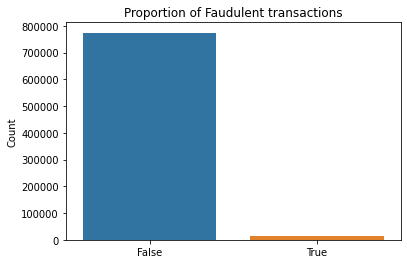

In [ ]:
#Lets have alook at how many transactions are fraudulent and normal
fraud_vals = data['isFraud'].value_counts()

sns.barplot(x=[0,1], y=fraud_vals)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')
plt.title('Proportion of Faudulent transactions')

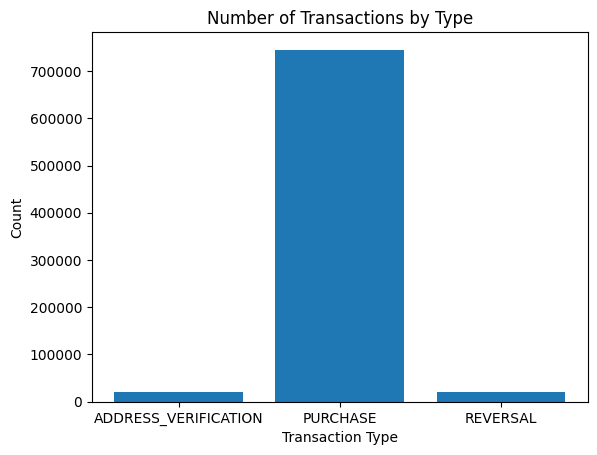

transactionType
ADDRESS_VERIFICATION     20169
PURCHASE                745193
REVERSAL                 20303
dtype: int64

In [ ]:
# Group by transaction type and count number of occurrences
transaction_counts = data.groupby("transactionType").size()

# Create bar plot
plt.bar(transaction_counts.index, transaction_counts.values)
plt.title("Number of Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

transaction_counts

Text(0.5, 1.0, 'Top 10 Accounts with the Most Fraudulent Transactions')

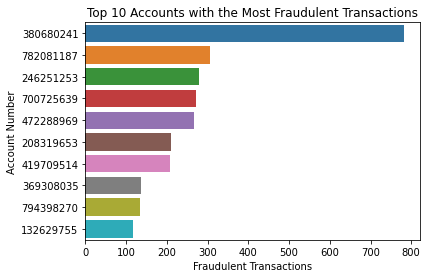

In [ ]:
#We now try to to investigate which accounts have the most amount of fraud tramsactions
fraud_transactions_only = data[data['isFraud'] == True]

top10_fraudulent_accounts = fraud_transactions_only['accountNumber'].value_counts().head(10)
sns.barplot(y=list(range(10)), x=top10_fraudulent_accounts.values, orient='h')

plt.yticks(ticks=list(range(10)), labels=top10_fraudulent_accounts.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraudulent Transactions')
plt.title('Top 10 Accounts with the Most Fraudulent Transactions')

Text(0.5, 1.0, 'Predominant Merchants of Account 380680241')

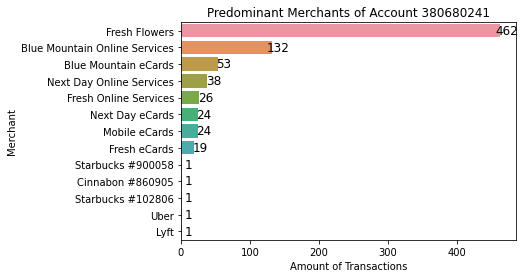

In [ ]:
fraud_king = top20_fraudulent_accounts.index[0]
fraud_king_data = data[(data['accountNumber'] == fraud_king) & (data['isFraud'] == True)]
fraud_king_top_merchants = fraud_king_data['merchantName'].value_counts()

ax = sns.barplot(y=list(range(len(fraud_king_top_merchants))), x=fraud_king_top_merchants.values, orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.text(width+9.5  ,
        p.get_y()+p.get_height()/2. + 0.2,
        int(width),
        ha="center", fontsize=12)

plt.yticks(ticks=list(range(len(fraud_king_top_merchants))), labels=fraud_king_top_merchants.index.tolist())
plt.xlabel('Amount of Transactions')
plt.ylabel('Merchant')
plt.title('Predominant Merchants of Account 380680241')

##Wrangling

In [ ]:

# Convert transactionDateTime to datetime format
data["transactionDateTime"] = pd.to_datetime(data["transactionDateTime"], format="%Y-%m-%dT%H:%M:%S")

# Sort the data by transactionDateTime
data = data.sort_values("transactionDateTime")

# Identify reversed transactions
#For each row, it checks whether it represents a "reversed transaction" by comparing various transaction details with the previous row, 
#including the transaction amount, account number, merchant name, merchant category code, point of sale (POS) entry mode, 
#transaction date and time, and transaction type. If all of these details match the previous row and the current row is a 
#"REVERSAL" type and the previous row is a "PURCHASE" type, then the indices of both rows are appended to a list called reversals. 

reversals = []
for i in range(1, len(data)):
    if data.iloc[i]["transactionAmount"] == data.iloc[i-1]["transactionAmount"] \
    and data.iloc[i]["accountNumber"] == data.iloc[i-1]["accountNumber"] \
    and data.iloc[i]["merchantName"] == data.iloc[i-1]["merchantName"] \
    and data.iloc[i]["merchantCategoryCode"] == data.iloc[i-1]["merchantCategoryCode"] \
    and data.iloc[i]["posEntryMode"] == data.iloc[i-1]["posEntryMode"] \
    and data.iloc[i]["transactionDateTime"] <= data.iloc[i-1]["transactionDateTime"] + timedelta(seconds=1) \
    and data.iloc[i]["transactionType"] == "REVERSAL" \
    and data.iloc[i-1]["transactionType"] == "PURCHASE":
        reversals.append(i-1)
        reversals.append(i)

# Identify multi-swipe transactions
#checks whether it represents a "multi-swipe transaction" by comparing  with the previous row the transaction amount, account number, 
#merchant name, merchant category code, point of sale (POS) entry mode, transaction date and time, and transaction type. 
#If all of these details match the previous row, the time difference between the two transactions is less than 60 seconds, 
#and both transactions are of type "PURCHASE", then the indices of both rows are appended to a list called multi_swipes. 
multi_swipes = []
for i in range(1, len(data)):
    if data.iloc[i]["transactionAmount"] == data.iloc[i-1]["transactionAmount"] \
    and data.iloc[i]["accountNumber"] == data.iloc[i-1]["accountNumber"] \
    and data.iloc[i]["merchantName"] == data.iloc[i-1]["merchantName"] \
    and data.iloc[i]["merchantCategoryCode"] == data.iloc[i-1]["merchantCategoryCode"] \
    and data.iloc[i]["posEntryMode"] == data.iloc[i-1]["posEntryMode"] \
    and data.iloc[i]["transactionDateTime"] - data.iloc[i-1]["transactionDateTime"] < timedelta(seconds=60) \
    and data.iloc[i]["transactionType"] == "PURCHASE" \
    and data.iloc[i-1]["transactionType"] == "PURCHASE":
        multi_swipes.append(i-1)
        multi_swipes.append(i)

# Compute total number of transactions and total dollar amount for reversed transactions
num_reversals = len(reversals) // 2
total_amount_reversed = np.abs(data.iloc[reversals]["transactionAmount"]).sum()

# Compute total number of transactions and total dollar amount for multi-swipe transactions
num_multi_swipes = len(multi_swipes) // 2
total_amount_multi_swipes = np.abs(data.iloc[multi_swipes]["transactionAmount"]).sum()

print("Number of reversed transactions:", num_reversals)
print("Total amount of reversed transactions:", total_amount_reversed)
print("Number of multi-swipe transactions:", num_multi_swipes)
print("Total amount of multi-swipe transactions:", total_amount_multi_swipes)

Number of reversed transactions: 25
Total amount of reversed transactions: 5654.740000000001
Number of multi-swipe transactions: 1229
Total amount of multi-swipe transactions: 363565.38


##Q2 : Data Preprocessing


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Create a new column indicating whether the card CVV matches the entered CVV
data['matchingCVV'] = data['cardCVV'] == data['enteredCVV']

# Convert boolean columns to 0 or 1
for col in ['cardPresent', 'matchingCVV', 'expirationDateKeyInMatch', 'isFraud']:
    data[col] = data[col].replace({False: 0, True: 1})

# Drop irrelevant columns
data.drop(['accountNumber', 'customerId', 'merchantCity', 'merchantState', 'merchantZip', 'echoBuffer','dateOfLastAddressChange','enteredCVV','cardCVV','cardLast4Digits', 'posOnPremises','currentExpDate','accountOpenDate', 'recurringAuthInd','transactionDateTime'], axis=1, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('isFraud', axis=1), data['isFraud'], test_size=0.2, random_state=42)

# Preprocess the data
numeric_features = ['creditLimit', 'availableMoney', 'transactionAmount']
categorical_features = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'matchingCVV', 'transactionType']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)




In [ ]:
from sklearn.decomposition import TruncatedSVD

# Perform dimensionality reduction with TruncatedSVD
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train_processed)
X_test_svd = svd.transform(X_test_processed)


In [ ]:
#Train a decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train_processed,y_train)

# Make predictions on the test set
y_pred_dt = dtree.predict(X_test_processed)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    154780
           1       0.05      0.06      0.06      2493

    accuracy                           0.97    157273
   macro avg       0.52      0.52      0.52    157273
weighted avg       0.97      0.97      0.97    157273



In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Calculate the precision-recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
auprc = auc(recall, precision)

# Print the AUPRC
print('AUPRC:', auprc)

AUPRC: 0.06354236258231474


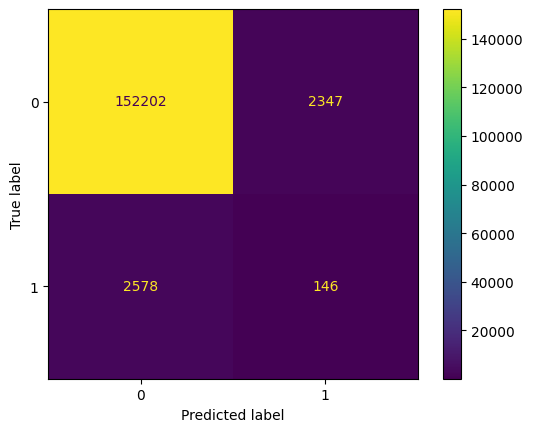

In [ ]:
cm = confusion_matrix(y_pred_dt, y_test)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [ ]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_processed, y_train)
 
# Make predictions on the test set
y_pred_logreg = model.predict(X_test_processed)

# Evaluate the model
print(classification_report(y_test, y_pred_logreg))



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       0.00      0.00      0.00      2493

    accuracy                           0.98    157273
   macro avg       0.49      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



In [ ]:
# Calculate the precision-recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_logreg)
auprc = auc(recall, precision)

# Print the AUPRC
print('AUPRC:', auprc)

AUPRC: 0.007925708799348903


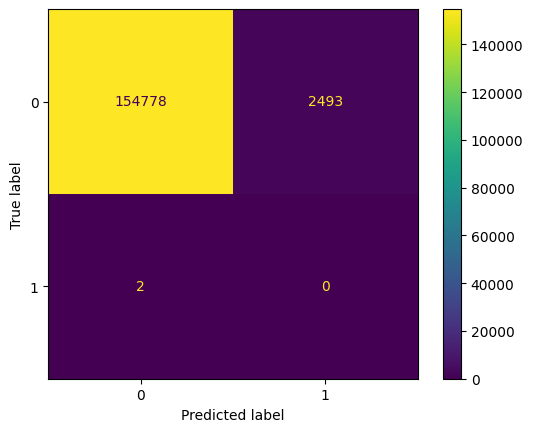

In [ ]:
cm = confusion_matrix(y_pred_logreg, y_test)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_processed)
# Evaluate the model

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       1.00      0.00      0.00      2493

    accuracy                           0.98    157273
   macro avg       0.99      0.50      0.50    157273
weighted avg       0.98      0.98      0.98    157273



In [ ]:
# Calculate the precision-recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

# Print the AUPRC
print('AUPRC:', auprc)

AUPRC: 0.507925708799349


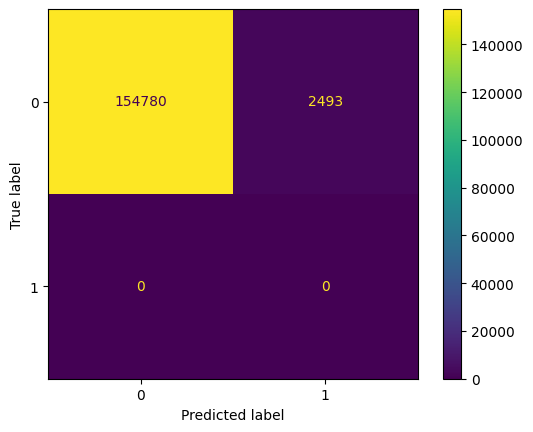

In [ ]:
cm = confusion_matrix(y_pred, y_test)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=0.1, random_state=42)
svm.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_processed)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_pred, y_test)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [ ]:
import xgboost as xgb

# Create a DMatrix for the training and test data
dtrain = xgb.DMatrix(X_train_processed, label=y_train)
dtest = xgb.DMatrix(X_test_processed, label=y_test)

# Set the hyperparameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'eta': 0.1,
    'gamma': 0.1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc'
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test data
y_pred = xgb_model.predict(dtest)

# Convert the predicted probabilities to binary labels
y_pred_binary = [1 if p >= 0.75 else 0 for p in y_pred]

print(classification_report(y_test, y_pred_binary, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       1.00      0.00      0.00      2493

    accuracy                           0.98    157273
   macro avg       0.99      0.50      0.50    157273
weighted avg       0.98      0.98      0.98    157273



In [ ]:
# Calculate the precision-recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_binary)
auprc = auc(recall, precision)

# Print the AUPRC
print('AUPRC:', auprc)

AUPRC: 0.507925708799349


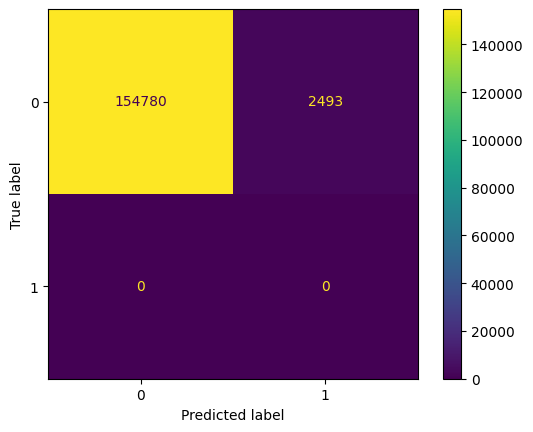

In [ ]:
cm = confusion_matrix(y_pred_binary, y_test)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


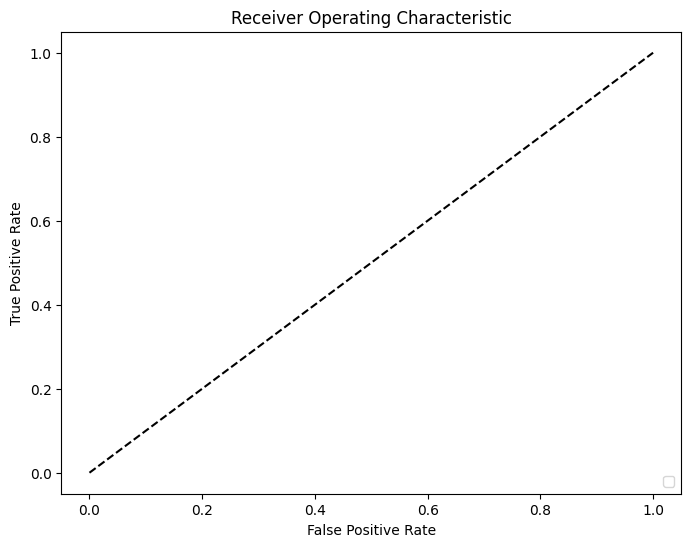

In [ ]:
from sklearn.metrics import roc_curve, auc

# train four different classification models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
    #('Support Vector Machine', SVC(random_state=42, probability=True))
]

# plot ROC curves for each model
plt.figure(figsize=(8, 6))
for name, model in models:
    model.fit(X_train_processed, y_train)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

# plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# set axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# show the plot
plt.show()